# Homework 2: Data Cleaning, EDA and Visualizations #

In [57]:
#import any libraries that you may need here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### We would like our new consultants and mentors to not just be technically skilled but also ethical leaders in their fields. Therefore, let us go over some basic data ethics knowledge. ###

## Section 1: Data Ethics

### What are the different types of biases we mentioned during lecture? Pick one that you observe in yourself and describe how it may influence your decision-making.

There are selection bias, unconscious bias, algorithmic bias, confounding bias, experimenter bias, confirmation bias, and bandwagon effect.
I observed experimenter bias in myself.In terms of post-stroke cognition, I held the preconceived belief that stroke patients'mental state became more depressed after stroke, which is biased. In fact, there are different trajectories of depression after stroke.Thus, before I recognized my experimenter bias, my modeling process and interpretation of the results are biased.

### How do you think you could overcome your biases? 

I could overcome my biases by understanding the scenario without making prior assumption or expectations. Being open and considering other probabilities is important.

### What is one example of how unethical data analysis impacted a group of people? Avoid repeating the lecture example. 

An example of how algorithmic bias induce unethical data analysis is the current field of genetic data. Genetic data is usually produced by individuals with high quality health insurance plans or relatively economically advantaged class.Thus, the current genetic dataset is biasedly represented by middle to upper socialeconomic class, which is not applicable for groups of people that do not categorized as this group, especially people from underadvantaged background.In this way, the data analysis based on such a dataset is unethical in the terms of not achieving equity.

## Section 2: Data Cleaning

### Pick out a dataset that you are interested in working with on [Kaggle](https://www.kaggle.com/datasets)! You should continue working with it in future homeworks so that you have a comprehensive data science project by the end of the semester so pick a good one.
### Download it and add it to the same folder that you are working in so that you are able to load it easily. You can refer to the [slides](https://docs.google.com/presentation/d/1UPj0F_I0CYoiUrbuSR9sYq50FEh8-RDG4usnTFaUBJI/edit#slide=id.g1c0cc4ea8d8_0_1369) that we used for onboarding for any help. ###

In [58]:
# load your dataset here, df is short for DataFrame. 
# E.g.You can use pd.read_csv() for csv files. 
df = pd.read_csv("TikTok_songs_2022.csv")

####  Example

In [59]:
elections = pd.read_csv("elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


### Now let's do some data cleaning! Here are a list of questions that you should think through and answer while looking at your data. If your data is from kaggle, it might already be really clean, but practise answering these questions. 

### *At this point, just answer these questions and examine your data but don't attempt to clean it yet* ###

- Does your data contain unrealistic or incorrect values?
    - Dates in the future
    - Locations that don’t exist
    - Negative counts
- Does your data violate obvious dependencies?
    - Age and birthday not matching
- Is the data coherent and consistent?
    - Misspellings and inconsistent labels
    - Was the data entered by hand?
- Are there signs of data falsification?
    - Repeated names, fake looking email addresses, uncommon names or fields
- Do we need to convert any of the variable types in order to prepare for modelling?
    - Qualitative variables that you might want to convert to numbers
- Any other interesting observations?

In [60]:
### Write your answers to each of the questions here 

# Q1: Does your data contain unrealistic or incorrect values?

# Some tracks have popularity of 0, which is unrealistic. If the song is popular on Tiktok,it is very likely to be popular throughout all platforms considering the heavy influence of Tiktok on our daily lives. At the first glance, I thought negative loudness seems to be incorrect, but negative loudness actually means the song is softer than the threshold of human hearing.

# Q2: Does your data violate obvious dependencies?

# No, the data is collected from Spotify using Spotify API, so I would assume Spotify labels it content correctly that the artist' name matches .

# Q3: Is the data coherent and consistent?

# The data is coherent and consistent in terms of format.There are no missing values as well.

# Q4: Are there signs of data falsification?

# There are no signs of data falsification, while there are two repeated songs but they are from different albums. This further shows that the importance of flexible criteria for data falsification for different context.

# Q5: Do we need to convert any of the variable types in order to prepare for modelling?

# We do not need to convert any of the variable types. 

# Q6: Any other interesting observations?

# It is interesting that The Weeknd's "Blinding Lights" in his album 'After Hours' is way more popular than that in "Blinding Lights."

In [61]:
# Any exploratory code here
# You can refer to the pandas section of the slides to do this
elections.describe()

,Year,Popular vote,%
count,182.000000,1.820000e+02,182.000000
mean,1934.087912,1.235364e+07,27.470350
std,57.048908,1.907715e+07,22.968034
min,1824.000000,1.007150e+05,0.098088
25%,1889.000000,3.876395e+05,1.219996
50%,1936.000000,1.709375e+06,37.677893
75%,1988.000000,1.897775e+07,48.354977
max,2020.000000,8.126892e+07,61.344703


In [62]:
print(df.info())
print(df.nunique())
df['track_artist']=df['track_name'].astype(str)+'_'+df['artist_name'].astype(str)
print(df['track_artist'].value_counts()[df['track_artist'].value_counts() > 1].index.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [63]:
df[df['track_name']=='Blinding Lights']

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_artist
114,Blinding Lights,The Weeknd,93,After Hours,90,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,Blinding Lights_The Weeknd
241,Blinding Lights,The Weeknd,93,Blinding Lights,18,0.513,0.796,-4.075,1,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,4,201573,Blinding Lights_The Weeknd


### More factors to consider

Here is a list of a few more questions to consider while data cleaning! Answer them to get a deeper understanding of your data.

- Do any of the keys in each table reference each other?
    - Primary keys are the column or set of columns in a table that determine the values of the remaining columns
    - Foreign keys are the column or sets of columns that reference primary keys in other tables
    - Can we merge them tables?
- What does each field specify? 
    - What is the variable type? 
    - Qualitative(Ordinal and Nominal), Quantitative (Continuous and discrete)
    - String, integer, float, list, array etc.
- Granularity? What does each record represent? Are there aggregations?
- Where was this data collected from? What types of questions were asked to gather this data? How representative is it? When was it collected?
- Truncated data 
    - Check the platform that you are working on, does it limit your data size?
- Time zone inconsistencies
    - Convert to common timezone
- Duplicated records or fields -> eliminate carefully
- Spelling errors
- Units not specified or inconsistent
- Missing Data
- Redundant data
- Simplify 
    - Take one column
    - Combine multiple columns  into one
- Aggregation
    - groupby


In [64]:
### Your answers to each of the questions/ observations about each factor here 

# Q1: Do any of the keys in each table reference each other?

# There is only one table in the dataset

# Q2: track_name: qualitative, string; artist_name: qualitative,string; artist_pop: quantitative,int; album: qualitative, string; track_pop: qualitative,string; danceability: quantitative, float; energy: quantitative, float; loudness: quantitative, float; mode: quantitative, int; key: quantitative, int; speechiness: quantitative, float; acousticness: quantitative, float; instrumentalness: quantitative, float; liveness: quantitative, float; valence: quantitative, float; tempo: quantitative, float;time_signature: quantitative, int; duration_ms: quantitative, int

#Q3: Each record represents a popular song on Tiktok

#Q4: Data have been collected using Spotify API from Spotify in 2022

#Q5: The dataset itself is not that big, since it only includes 263 popular Tiktok songs

#Q6: There is no time zone inconsistencies

#Q7: There is no repeated records as checked by previous section

#Q8-11: The data format is quite organized and accruate, since it is collected from Spotify

#Q12-13: Each variable demonstrates a distinct measure of the song, so simplification and aggregation are not necessary.

In [65]:
# Any exploratory code here. 
# You can refer to the pandas section of the slides to do this

In [66]:
type(df['track_name'][0])

str

## Addressing Missing Data/ Default Values

### As you cleaned your data, you may have observed missing data/ default values. Decide what to do with these values and explain your decision-making process.

Here are some methods to deal with missing values:
- Drop records with missing values
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Imputation: Inferring missing values
    - Replace with average value (closest related subgroup mean)
    - Replace with a random value from the closest subgroup(Hot deck imputation) 
- Numerical: 
    - mean, mode, median
- Categorical
    - Mode, new category
- Directly model missing values during future analysis

In [67]:
#Any preliminary cleaning necessary to start dealing with missing values

In [68]:
#Code addressing missing values here e.g. df.dropna()
elections.dropna().head(5) #remove this line, this is just an example

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [69]:
#Explain what types of missing values you found and the decisions you made in addressing them

In [70]:
# As checked in previous sections, the dataset is clean and no missing value needs to be addressed.

## Handling outliers

### Now let's handle any outliers. Same process as before!

Here are some methods to deal with handling outliers:
- Drop records with outliers
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Replace, as with Inferring missing values
    - Typically with min or max
- Binning
    - E.g. greater than 5

count    263.000000
mean      59.844106
std       24.976524
min        0.000000
25%       47.000000
50%       66.000000
75%       79.500000
max       97.000000
Name: track_pop, dtype: float64


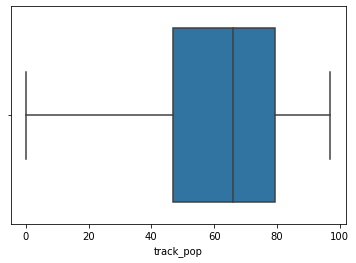

In [71]:
#Code addressing outliers here
sns.boxplot(x = 'track_pop', data = df)
print(df['track_pop'].describe())

In [72]:
#Explain what types of outliers you found and the decisions you made in addressing them

I found min values of the popularity of the track as 0, which are unrealistic as addressed in the previous section and outliers. I want to study the significant features of Tiktok popular songs in 2022, so I can better predict potential popular songs in 2023. I will just ignore the tracks with popularity lower the firstquartile considering the purpose of this data analysis. 

## Let's clean!

### Now that we have a much deeper understanding of our data and have dealt with a few preliminary issues, clean up the data so that it is useful and accurate!  

In [73]:
### Your code here
df=df[df['track_pop']>=47]

In [74]:
df.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,68.368687,71.181818,0.716975,0.681101,-6.192545,0.530303,5.611111,0.115334,0.191268,0.019771,0.192928,0.516589,122.216005,3.984848,176478.585859
std,15.854363,13.832474,0.117039,0.138775,1.892194,0.500346,3.721972,0.098522,0.211164,0.105890,0.149004,0.219204,25.092004,0.235811,35600.328927
min,29.000000,47.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025900,0.000038,0.000000,0.026500,0.038600,62.948000,3.000000,85742.000000
25%,58.250000,58.000000,0.659750,0.590250,-7.312500,0.000000,2.000000,0.045750,0.025250,0.000000,0.094325,0.367750,106.065000,4.000000,151791.500000
50%,68.000000,76.000000,0.728000,0.695500,-5.996000,1.000000,6.000000,0.070600,0.121000,0.000005,0.128000,0.485000,122.018500,4.000000,172529.000000
75%,82.000000,82.000000,0.795750,0.782750,-4.723000,1.000000,9.000000,0.153750,0.287250,0.000382,0.258750,0.687000,130.009750,4.000000,201154.500000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.936000,0.915000,0.790000,0.956000,187.906000,5.000000,298933.000000


## Section 3: EDA 

### Study the data and observe any potential trends/ consider models that you might be able to implement. Study the relationships between the different columns and see if you can find any insights. List at least 2 potential project ideas.

In [75]:
# Exploratory code here
#1.What are some significant accoustic characteristics of the track that contribute to its popularity?
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('track_pop ~loudness+mode+key+tempo+time_signature',data=df).fit()
print(sm.stats.anova_lm(model,typ=2))

#2 How are the danceability of a song affect its popularity?
print('correlation between danceability and popularity:',df['danceability'].corr(df['track_pop']))
#e.g. df.corr() gives you the correlation coefficients between columns

                      sum_sq     df         F    PR(>F)
loudness            0.371609    1.0  0.001949  0.964835
mode                2.309111    1.0  0.012109  0.912490
key               597.081095    1.0  3.131202  0.078394
tempo              48.557956    1.0  0.254647  0.614401
time_signature    398.712659    1.0  2.090922  0.149807
Residual        36611.996549  192.0       NaN       NaN
correlation between danceability and popularity: -0.14893204348096664


# Section 4: Visualizations

### This is also part of EDA! The whole process is rather cyclical. For this part, make 3 visualizations and describe what you see. 

### Then, make 2 out of 3 these visualizations.
### 1. Heat Map
### 2. KDE Plot
### 3. Box Plot

### So in total, you should have made 5 visualizations.

<AxesSubplot:>

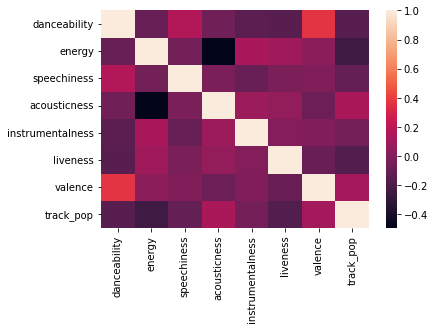

In [76]:
#Visualization 1
nonaccoustic_factors=['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','track_pop']
sns.heatmap(df[nonaccoustic_factors].corr(),data=df[nonaccoustic_factors])

#Your observations
#It is very self-exploratory that ascoutic and energy are highly correlated, since more you feel you hear more energy you can feel.
#Valence and danceability are also positively correlated, which makes sense that when people feel more positive towards a song, they tend to dance with it.

<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

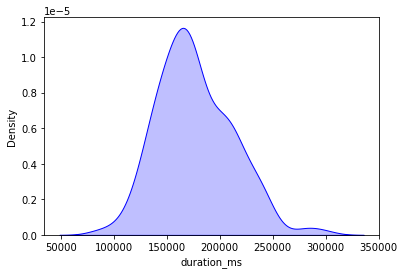

In [78]:
#Visualization 2

sns.kdeplot(data=df['duration_ms'], color='blue',shade=True)

#Your observations
# The time duration of the popular songs is a little bit skewed to the right.

<AxesSubplot:xlabel='artist_pop'>

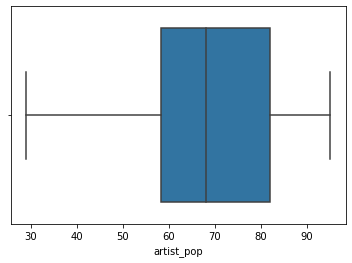

In [77]:
#Visualization 3

sns.boxplot(x = 'artist_pop', data = df)
#Your observations
# A large percentage of the artists of the popular songs is relatively more popular.

<AxesSubplot:>

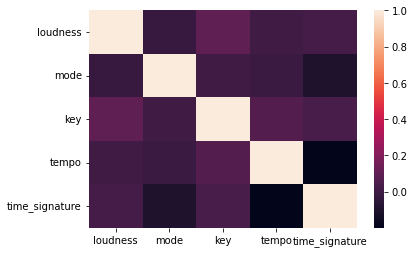

In [80]:
#Visualization 4

accoustic_factors=['loudness','mode','key','tempo','time_signature']
sns.heatmap(df[accoustic_factors].corr(),data=df[accoustic_factors])

#Your observations
#The strong negative correlation between tempo and time_signature is very reasonble, since faster the tempo comes with shorter time signature.

<AxesSubplot:xlabel='artist_pop', ylabel='Density'>

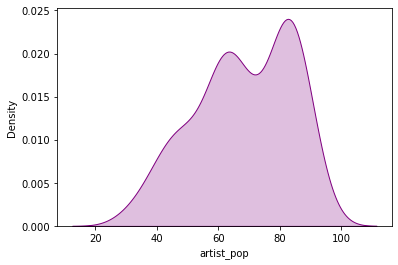

In [82]:
#Visualization 5

sns.kdeplot(data=df['artist_pop'], color='purple',shade=True)


#Your observations
#The popularity of artists is skewed to the left, which is quite reasonble, since people listen more and dance more with the songs of popular artists.

### Which visualization is the best for your dataset and why?

In [83]:
#Your answer here
#Heat Map is the best for my dataset, because I want to study the correlations between variables and factors contributing to the popularity of the songs.

# Good job!

### As a quick wrap-up, think about how your biases might have affected your judgement and if there is anything you want to work on. 

### As you can see, working with a dataset outside of class is much less structured. However, with practice, you will be become much sharper and efficient at wrangling data. Good luck with the next project!

In [84]:
#Quick reflection#
# Algorithmic bias might have affect my judgement because I interpret variables such as "acousticness" and "liveness" based on my personal understanding. The data is not coded clearly.

### Fantastic job ~ Remember to push all your changes your GitHub repository and submit on Gradescope.
### Thank you for your time :)
### That's all for this homework! 